In [247]:
import numpy as np
import pandas as pd

import sqlite3
import json
import orjson

import matplotlib.pyplot as plt

from popular_times import PopularTimes


In [2]:
# goal is to reduce the size of daily scraped file, e.g. philly_outdoor_popularity_half_hour_0329_0330.db

conn_philly_0329 = sqlite3.connect("data/philly_outdoor_popularity_half_hour_0329_0330.db")
philly_0329 = pd.read_sql_query("SELECT id, request_id, rating_n, timestamp, curr_popularity FROM curr_popularity", conn_philly_0329)
conn_philly_0329.close()


In [3]:
philly_0329

,id,request_id,rating_n,timestamp,curr_popularity
0,ChIJzcow6Xb1t4kRQVE7s1AWWr8,ChIJzcow6Xb1t4kRQVE7s1AWWr8,5,1616994799538,-1
1,ChIJAWkAqNL1t4kRlm4slspOSXo,ChIJAWkAqNL1t4kRlm4slspOSXo,1327,1616994799604,-1
2,ChIJ_bk5K1z1t4kRQNverIUOVko,ChIJ_bk5K1z1t4kRQNverIUOVko,179,1616994799628,-1
3,ChIJAWkAqNL1t4kRlm4slspOSXo,ChIJ_-2cQEX1t4kRoiCrmNMbrQ8,1327,1616994799633,-1
4,ChIJFy3VdF_2t4kRQ5QBygrXx6I,ChIJFy3VdF_2t4kRQ5QBygrXx6I,23,1616994800793,-1
...,...,...,...,...,...
89195,ChIJlSs5QzJazokRM8dI3liz_UY,ChIJlSs5QzJazokRM8dI3liz_UY,9,1617083493668,-1
89196,ChIJVVVVVWXCy4kRrROvaVhWl_U,ChIJVVVVVWXCy4kRrROvaVhWl_U,66,1617083493719,-1
89197,ChIJk00-rKOrzokRS_4BHwJvaUM,ChIJk00-rKOrzokRS_4BHwJvaUM,287,1617083494079,-1
89198,IhoSGAoUChIJ72eKchbzz4kRxV6xrjfd5QAQUg,ChIJaeKPQD_zz4kRy4c8TvnwGIg,0,1617083494347,-1


In [5]:
conn_philly_0329 = sqlite3.connect("data/philly_outdoor_popularity_half_hour_0329_0330.db")
philly_0329_data = pd.read_sql_query("SELECT results FROM curr_popularity", conn_philly_0329)
conn_philly_0329.close()

In [59]:
content = json.loads(philly_0329_data['results'][0])
content

['ChIJzcow6Xb1t4kRQVE7s1AWWr8',
 4.8,
 5,
 [[7,
   [[4, 0, '', '', '4 AM'],
    [5, 0, '', '', '5 AM'],
    [6, 0, '', '', '6 AM'],
    [7, 3, 'Usually not busy', '', '7 AM'],
    [8, 13, 'Usually not busy', '', '8 AM'],
    [9, 24, 'Usually not too busy', '', '9 AM'],
    [10, 37, 'Usually not too busy', '', '10 AM'],
    [11, 44, 'Usually not too busy', '', '11 AM'],
    [12, 48, 'Usually not too busy', '', '12 PM'],
    [13, 44, 'Usually not too busy', '', '1 PM'],
    [14, 34, 'Usually not too busy', '', '2 PM'],
    [15, 34, 'Usually not too busy', '', '3 PM'],
    [16, 58, 'Usually a little busy', '', '4 PM'],
    [17, 37, 'Usually not too busy', '', '5 PM'],
    [18, 3, 'Usually not busy', '', '6 PM'],
    [19, 0, '', '', '7 PM'],
    [20, 0, '', '', '8 PM'],
    [21, 0, '', '', '9 PM'],
    [22, 0, '', '', '10 PM'],
    [23, 0, '', '', '11 PM'],
    [0, 0, '', '', '12 AM'],
    [1, 0, '', '', '1 AM'],
    [2, 0, '', '', '2 AM'],
    [3, 0, '', '', '3 AM']],
   0],
  [1,
   [[4,

In [53]:
PopularTimes._fields

('place_id',
 'rating',
 'rating_n',
 'popular_times',
 'current_popularity',
 'time_spent')

In [47]:
[PopularTimes(*json.loads(philly_0329_data['results'][300])).popular_times[i][2] for i in range(7)]

[0, 0, 0, 0, 0, 0, 0]

In [58]:
len(PopularTimes(*json.loads(philly_0329_data['results'][300])).popular_times[0])

3

### Test the compression by removing the text description about popularity in popular times

Within results blob, `place_id`, `rating_n`, and `current_popularity` have been saved, the rest `rating`, `popular_times`, `time_spent` were not saved previously and are included in new dataframe.


In [212]:
conn = sqlite3.connect("data/philly_outdoor_popularity_half_hour_0329_0330.db")
# philly_data = pd.read_sql_query("SELECT * FROM curr_popularity LIMIT 100", conn)
philly_data = pd.read_sql_query("SELECT * FROM curr_popularity", conn)

conn.close()

In [63]:
philly_data

,batch_id,id,timestamp,curr_popularity,rating_n,request_id,results
0,202103290513,ChIJzcow6Xb1t4kRQVE7s1AWWr8,1616994799538,-1,5,ChIJzcow6Xb1t4kRQVE7s1AWWr8,"b'[""ChIJzcow6Xb1t4kRQVE7s1AWWr8"",4.8,5,[[7,[[4..."
1,202103290513,ChIJAWkAqNL1t4kRlm4slspOSXo,1616994799604,-1,1327,ChIJAWkAqNL1t4kRlm4slspOSXo,"b'[""ChIJAWkAqNL1t4kRlm4slspOSXo"",4.7,1327,[[7,..."
2,202103290513,ChIJ_bk5K1z1t4kRQNverIUOVko,1616994799628,-1,179,ChIJ_bk5K1z1t4kRQNverIUOVko,"b'[""ChIJ_bk5K1z1t4kRQNverIUOVko"",4.7,179,[[7,[..."
3,202103290513,ChIJAWkAqNL1t4kRlm4slspOSXo,1616994799633,-1,1327,ChIJ_-2cQEX1t4kRoiCrmNMbrQ8,"b'[""ChIJAWkAqNL1t4kRlm4slspOSXo"",4.7,1327,[[7,..."
4,202103290513,ChIJFy3VdF_2t4kRQ5QBygrXx6I,1616994800793,-1,23,ChIJFy3VdF_2t4kRQ5QBygrXx6I,"b'[""ChIJFy3VdF_2t4kRQ5QBygrXx6I"",4.7,23,[[7,[[..."
...,...,...,...,...,...,...,...
95,202103290513,ChIJYfngWAjZx4kR4sJER5xCMg0,1616994827676,-1,1,ChIJYfngWAjZx4kR4sJER5xCMg0,"b'[""ChIJYfngWAjZx4kR4sJER5xCMg0"",5,1,null,null..."
96,202103290513,ChIJ80pG03XZx4kRbcBaG50irUA,1616994827889,-1,254,ChIJ80pG03XZx4kRbcBaG50irUA,"b'[""ChIJ80pG03XZx4kRbcBaG50irUA"",4.8,254,[[7,[..."
97,202103290513,ChIJHYtEZ_bXx4kRZ8YaQKwIxY8,1616994828346,-1,8,ChIJHYtEZ_bXx4kRZ8YaQKwIxY8,"b'[""ChIJHYtEZ_bXx4kRZ8YaQKwIxY8"",4.1,8,[[7,[[6..."
98,202103290513,ChIJ63LL-L3Xx4kRZUiJJlx9nig,1616994828570,-1,448,ChIJ63LL-L3Xx4kRZUiJJlx9nig,"b'[""ChIJ63LL-L3Xx4kRZUiJJlx9nig"",4.5,448,[[7,[..."


In [78]:
PopularTimes(*json.loads(philly_data['results'][0])).rating

4.8

In [68]:
def extract_feature_from_results_blob(individual_result, feature):
    return getattr(PopularTimes(*json.loads(individual_result)), feature)

In [213]:
philly_data['rating'] = philly_data['results'].apply(extract_feature_from_results_blob, args=('rating', ))

philly_data['time_spent'] = philly_data['results'].apply(extract_feature_from_results_blob, args=('time_spent', ))

In [97]:
# the amount of data with time_spent
philly_data['time_spent'][philly_data['time_spent'].notnull()]

(42,)

In [187]:
def compress_popular_times(popular_times_item):
    days = []
    average_popularity = []
    if popular_times_item is not None:
        for day in popular_times_item:
            days.append(day[0])
            pop_hour = []
            if day[1] is not None:
                for hour in day[1]:
                    pop_hour.append(hour[:2])
            average_popularity.append(pop_hour)

#         days = [popular_times_item[iweekday][0] for iweekday in range(num_of_days)]
#         average_popularity = [[popular_times_item[iweekday][1][ihour][:2] for ihour in range(num_of_hours)] 
#                               for iweekday in range(num_of_days)]
    
    # return series so when calling .apply, output becomes dataframe, see https://stackoverflow.com/a/23690329    
    return pd.Series([days, average_popularity])
    

In [214]:
philly_data[['popular_times_day', 'popular_times']] = philly_data['results'].apply(
    extract_feature_from_results_blob, args=('popular_times',)).apply(compress_popular_times)

In [200]:
philly_data

,batch_id,id,timestamp,curr_popularity,rating_n,request_id,rating,time_spent,popular_times_day,popular_times
0,202103290513,ChIJzcow6Xb1t4kRQVE7s1AWWr8,1616994799538,-1,5,ChIJzcow6Xb1t4kRQVE7s1AWWr8,4.8,None,"[7, 1, 2, 3, 4, 5, 6]","[[[4, 0], [5, 0], [6, 0], [7, 3], [8, 13], [9,..."
1,202103290513,ChIJAWkAqNL1t4kRlm4slspOSXo,1616994799604,-1,1327,ChIJAWkAqNL1t4kRlm4slspOSXo,4.7,"[60, 60]","[7, 1, 2, 3, 4, 5, 6]","[[[6, 0], [7, 3], [8, 8], [9, 16], [10, 26], [..."
2,202103290513,ChIJ_bk5K1z1t4kRQNverIUOVko,1616994799628,-1,179,ChIJ_bk5K1z1t4kRQNverIUOVko,4.7,"[45, 45]","[7, 1, 2, 3, 4, 5, 6]","[[[6, 0], [7, 0], [8, 1], [9, 13], [10, 36], [..."
3,202103290513,ChIJAWkAqNL1t4kRlm4slspOSXo,1616994799633,-1,1327,ChIJ_-2cQEX1t4kRoiCrmNMbrQ8,4.7,"[60, 60]","[7, 1, 2, 3, 4, 5, 6]","[[[6, 0], [7, 3], [8, 8], [9, 16], [10, 26], [..."
4,202103290513,ChIJFy3VdF_2t4kRQ5QBygrXx6I,1616994800793,-1,23,ChIJFy3VdF_2t4kRQ5QBygrXx6I,4.7,None,"[7, 1, 2, 3, 4, 5, 6]","[[[4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, ..."
...,...,...,...,...,...,...,...,...,...,...
95,202103290513,ChIJYfngWAjZx4kR4sJER5xCMg0,1616994827676,-1,1,ChIJYfngWAjZx4kR4sJER5xCMg0,5.0,None,[],[]
96,202103290513,ChIJ80pG03XZx4kRbcBaG50irUA,1616994827889,-1,254,ChIJ80pG03XZx4kRbcBaG50irUA,4.8,None,"[7, 1, 2, 3, 4, 5, 6]","[[[4, 0], [5, 0], [6, 2], [7, 8], [8, 16], [9,..."
97,202103290513,ChIJHYtEZ_bXx4kRZ8YaQKwIxY8,1616994828346,-1,8,ChIJHYtEZ_bXx4kRZ8YaQKwIxY8,4.1,None,"[7, 1, 2, 3, 4, 5, 6]","[[[6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11..."
98,202103290513,ChIJ63LL-L3Xx4kRZUiJJlx9nig,1616994828570,-1,448,ChIJ63LL-L3Xx4kRZUiJJlx9nig,4.5,None,"[7, 1, 2, 3, 4, 5, 6]","[[[4, 0], [5, 0], [6, 0], [7, 2], [8, 6], [9, ..."


In [210]:
def write_compressed_db(df, file_name):
    for name in ['time_spent', 'popular_times_day', 'popular_times']:
        df[name] = df[name].apply(lambda x:orjson.dumps(x))
        
    conn = sqlite3.connect(file_name)
    df.drop(columns=['results']).to_sql('compressed_curr_popularity', conn)
    conn.close()

In [215]:
write_compressed_db(philly_data, 'data/compressed/philly_outdoor_popularity_half_hour_0329_0330_compress.db')

In [ ]:
# TODO: use orjson for faster read and write; combine the portion to access namedtuple so only need to json.loads once; into a function


#### Inspect the meaning of text
Original "popular times" includes a field with text, such as "Usually not too busy" - are these words carry meanings that are not entirly covered by the numerical value at the hour? 

Conclusion: four categories were set based on the numerical values, and the boundaries seem to be set according to the distribution of collected popular times.

In [217]:
conn = sqlite3.connect("data/philly_outdoor_popularity_half_hour_0329_0330.db")
philly_data = pd.read_sql_query("SELECT results FROM curr_popularity LIMIT 1000", conn)

conn.close()

In [221]:
popular_times = philly_data['results'].apply(extract_feature_from_results_blob, args=('popular_times',))

In [239]:
# use a dictionary to capture all numbers before the text description
popular_times_text_descript = {}
for item in popular_times:
    if item is not None: 
        for day in item:
            if day[1] is not None:
                for hour in day[1]:
                    if hour[2] in popular_times_text_descript:
                        popular_times_text_descript[hour[2]].append(hour[1])
                    else:
                        popular_times_text_descript[hour[2]] = [hour[1]]
        

In [246]:
print(popular_times_text_descript.keys())
[set(popular_times_text_descript[key]) for key in popular_times_text_descript.keys()]

dict_keys(['', 'Usually not busy', 'Usually not too busy', 'Usually a little busy', 'Usually as busy as it gets'])


[{0},
 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20},
 {20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50},
 {50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80},
 {79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100}]

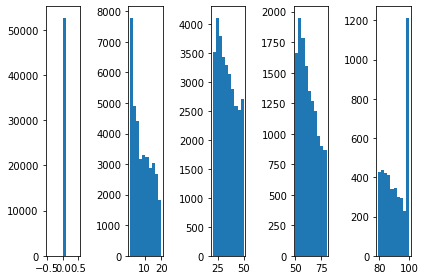

In [252]:
for ind, key in enumerate(popular_times_text_descript.keys()):
    plt.subplot(1,5,ind+1)
    plt.hist(popular_times_text_descript[key]); 
plt.tight_layout()

In [236]:
curr_popularity = philly_data['results'].apply(extract_feature_from_results_blob, args=('current_popularity',))
curr_popularity

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: results, Length: 1000, dtype: float64

In [234]:
np.where(curr_popularity.notnull())

(array([ 38, 156, 252, 312, 330, 337, 344, 350, 357, 379, 427, 432, 439,
        440, 498, 519, 537, 540, 610, 656, 657, 684, 699, 757, 759, 802,
        816, 835, 862, 912, 929, 964, 978, 986, 992]),)

In [237]:
popular_times[38]

[[7,
  [[4, 0, '', '', '4 AM'],
   [5, 0, '', '', '5 AM'],
   [6, 2, 'Usually not busy', '', '6 AM'],
   [7, 5, 'Usually not busy', '', '7 AM'],
   [8, 10, 'Usually not busy', '', '8 AM'],
   [9, 16, 'Usually not busy', '', '9 AM'],
   [10, 22, 'Usually not too busy', '', '10 AM'],
   [11, 29, 'Usually not too busy', '', '11 AM'],
   [12, 38, 'Usually not too busy', '', '12 PM'],
   [13, 49, 'Usually not too busy', '', '1 PM'],
   [14, 58, 'Usually a little busy', '', '2 PM'],
   [15, 61, 'Usually a little busy', '', '3 PM'],
   [16, 53, 'Usually a little busy', '', '4 PM'],
   [17, 38, 'Usually not too busy', '', '5 PM'],
   [18, 21, 'Usually not too busy', '', '6 PM'],
   [19, 9, 'Usually not busy', '', '7 PM'],
   [20, 2, 'Usually not busy', '', '8 PM'],
   [21, 0, '', '', '9 PM'],
   [22, 0, '', '', '10 PM'],
   [23, 0, '', '', '11 PM'],
   [0, 0, '', '', '12 AM'],
   [1, 0, '', '', '1 AM'],
   [2, 0, '', '', '2 AM'],
   [3, 0, '', '', '3 AM']],
  0],
 [1,
  [[4, 0, '', '', '4 AM']